# C-More

### 1. Process text to extract keywords

In [1]:
import json
import pandas as pd

import nltk
from nltk.tokenize import TweetTokenizer
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

#### 1.1. Load json data into a dataframe

In [2]:
list_json = []

with open('tweet_json_1day.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

In [3]:
df['retweets'] = df['public_metrics'].map(lambda x: x['retweet_count'])
df['replies'] = df['public_metrics'].map(lambda x: x['reply_count'])
df['likes'] = df['public_metrics'].map(lambda x: x['like_count'])
df['quotes'] = df['public_metrics'].map(lambda x: x['quote_count'])

In [4]:
df.drop('public_metrics', axis=1, inplace=True)

In [5]:
df.head()

,id,text,lang,created_at,retweets,replies,likes,quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21T23:59:32.000Z,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7153 non-null   object
 1   text        7153 non-null   object
 2   lang        7153 non-null   object
 3   created_at  7153 non-null   object
 4   retweets    7153 non-null   int64 
 5   replies     7153 non-null   int64 
 6   likes       7153 non-null   int64 
 7   quotes      7153 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 447.2+ KB


#### 1.2. Select only tweets in English

In [7]:
df_en = df[df['lang'] == 'en'].copy()

In [8]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 0 to 7151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5377 non-null   object
 1   text        5377 non-null   object
 2   lang        5377 non-null   object
 3   created_at  5377 non-null   object
 4   retweets    5377 non-null   int64 
 5   replies     5377 non-null   int64 
 6   likes       5377 non-null   int64 
 7   quotes      5377 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 378.1+ KB


#### 1.3. Process text

In [9]:
# select longest tweet for testing purposes

test_text = sorted(df_en['text'], key=lambda x: len(x), reverse=True)[0]

test_text

'@bungoman @moothought @__justplaying @heavenbent11 @IgorBrigadir @huggingpuppy @flybottlemist @panchromaticity @temujin9 @Duderichy @jicapal @goblinodds @_brentbaum @scrmshw @OccultBoyscout @bogmeat @Knipps @OneEyedAlpaca @SoupOfToday @Acre108 @ObserverSuns @ZacharyHundley @_holyweather @anonynaut @magicianbrain @mimi10v3 @karnagraha @er1enney0ung @Lithros @parafactual @KrikkitMotel @__frye @eggprophet @pareinoia @TeddyRaccovelt @dancinghorse16 @storebrandguy @NLRG_ @irafeierabend @bloobsandnoods @RootOfUnity @VesselOfSpirit @MaskOfFace @ObjectOfObjects @CurlOfGradient @FingerOfHand @CauseOfProblem @ModelOfTheory @ReneeSolana @quotidiania Good morning to all you wonderful people. I just tried a new coffee from McDonalds and it is wonderful, just like you'

We are going to use a tokenizer that that is particularly useful for social media texts: https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer .

In [10]:
tweet_tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
# redule_len=True replaces repeated character sequences of length 3 or greater with sequences of length 3
# examples: waaaaayyyy --> waaayyy
# strip_handles=True removes Twitter handles (@xxxx...)

tweet_tokenizer.tokenize(test_text)

['Good',
 'morning',
 'to',
 'all',
 'you',
 'wonderful',
 'people',
 '.',
 'I',
 'just',
 'tried',
 'a',
 'new',
 'coffee',
 'from',
 'McDonalds',
 'and',
 'it',
 'is',
 'wonderful',
 ',',
 'just',
 'like',
 'you']

Our tokenizer keeps punctuation signs, which are not necessary for our task of keyword extraction. We are going to remove them.

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
punct = string.punctuation

In [13]:
punct += "’" # add "’" to punct

In [14]:
punct += "…" # add "…" to punct

In [15]:
punct += "..." # add "..." to punct

In [16]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’…...'

In [17]:
# tokenize text and remove punctuation

def tokens_nopunct(text):
    
    tokens = [token for token in TweetTokenizer(reduce_len=True, strip_handles=True).tokenize(text)]
    return [token for token in tokens if token not in punct]

In [18]:
tokens_nopunct(test_text)

['Good',
 'morning',
 'to',
 'all',
 'you',
 'wonderful',
 'people',
 'I',
 'just',
 'tried',
 'a',
 'new',
 'coffee',
 'from',
 'McDonalds',
 'and',
 'it',
 'is',
 'wonderful',
 'just',
 'like',
 'you']

As a final step, we can define a set of stop words.

In [19]:
# nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))

In [20]:
len(stopwords)

179

Scikit-learn also has its own set of stop words:

In [21]:
len(sklearn_stop_words)

318

We can combine theses two sets (union) or use only the common stop words (intersection). We can also add or exclude any given words from our set of stop words.

We will use NLTK stop words for now.

In [22]:
# removes stop words

def remove_stop(tokens):
    return [token for token in tokens if token not in stopwords]

In [23]:
pipeline = [str.lower, tokens_nopunct, remove_stop] # this will be our default pipeline
# lowercases words, tokenizes text, removes punctuation and removes stop words

def process_text(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [24]:
df_en['tokens'] = df['text'].apply(process_text, pipeline=pipeline)

In [25]:
df_en

,id,text,lang,created_at,retweets,replies,likes,quotes,tokens
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0,[breakfast]
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0,"[respect, chicken, nuggets, crispy, chicken, s..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0,"[right, i'm, tapping, save, sanity, summing, f..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0,"[bad, im, sending, 8, mcdonalds, large, fries,..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en,2022-06-21T23:58:43.000Z,0,0,1,0,"[last, time, went, mcdonalds, lol, https://t.c..."
...,...,...,...,...,...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,en,2022-06-21T00:00:55.000Z,1,0,3,0,"[belos, comes, back, give, mcdonalds, sprite]"
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,en,2022-06-21T00:00:49.000Z,0,0,0,0,"[mcdonalds, suddenly, 4, school, buses, filled..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,en,2022-06-21T00:00:40.000Z,0,0,1,1,"[im, sorry, told, u, drink, mcdonalds, sprite,..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,en,2022-06-21T00:00:31.000Z,0,1,2,0,"[tough, times, inflation, shrinking, large, fr..."


We can now proceed to our second step and extract the most relevant keywords.

### 2. Extract keywords

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

#### 2.1. Create bag-of-words

In [27]:
bow_vectorizer = CountVectorizer(lowercase=True, 
                                 tokenizer=tokens_nopunct, 
                                 stop_words=stopwords)

In [28]:
cv_bow = bow_vectorizer.fit_transform(df_en['text'])

In [29]:
df_cv_bow = pd.DataFrame(cv_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

In [30]:
df_cv_bow

,#1000xgem,#12,#180,#20towards200,#23794,#300m,#34188,#55centtomatoeslices,#666,#80s,...,🧡,🧢,🧵,🧼,🫖,🫠,🫡,🫤,🫵,🫶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For each one of our 5377 documents (tweets), we now have a count of how many times any given token appears in each document.

We can sum these values and get the frequency of each token in our corpus.

#### 2.2. Compute word frequency

In [31]:
df_freq = pd.DataFrame(df_cv_bow.sum(axis = 0).index, columns=['token'])
df_freq['freq'] = df_cv_bow.sum(axis = 0).values

df_freq.head()

,token,freq
0,#1000xgem,2
1,#12,1
2,#180,2
3,#20towards200,3
4,#23794,1


In [32]:
# sort df in descending order

df_freq.set_index('token', inplace=True)
df_freq.sort_values('freq', ascending=False, inplace=True)
df_freq.head(10)

,freq
token,
mcdonalds,2817
like,456
get,422
food,254
back,251
us,224
go,211
one,208
want,205


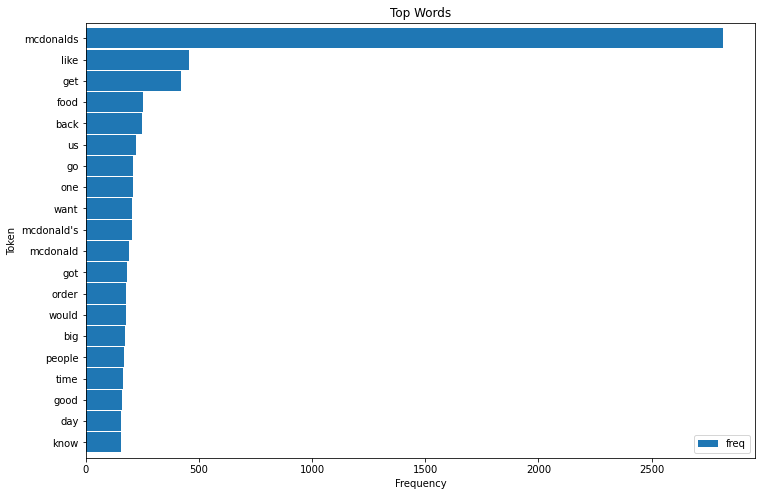

In [33]:
ax = df_freq.head(20).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words');

These are our top-20 (most frequent) words. We should think on excluding the words mcdonalds, mcdonald's and mcdonald by adding these words to our stop words.

We should also have in mind that we used a very simple query to extract our tweets for testing purposes.